import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Loading Data

In [2]:
data=pd.read_csv(r"D:\ICT Academy\unsupervised learning\assignment\Wine_clust.csv")
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Checking for null values

In [3]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

In [4]:
data.shape

(178, 13)

In [5]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

KMeans Clustering


In [6]:
from sklearn.cluster import KMeans

Elbow method to find out the nuber of clusters

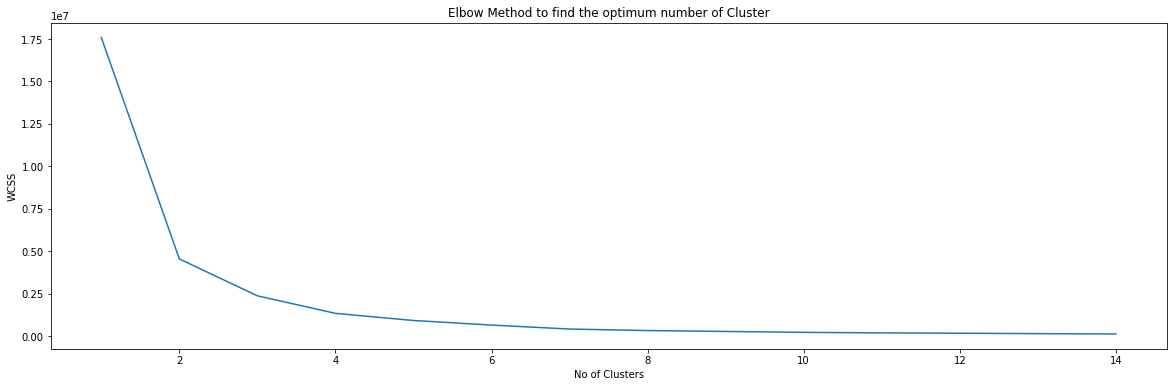

In [7]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(20,6))
plt.plot(range(1,15),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to find the optimum number of Cluster')
plt.show()

In [8]:
#we can find out the correct one by checking the silhouette_score

In [9]:
#clustering with model no as 2

In [10]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans1=kmeans.fit_predict(data)


In [11]:
#clustering with model no as 3

In [12]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans2=kmeans.fit_predict(data)


Evaluation Metrix

In [13]:
from sklearn.metrics import silhouette_score

In [14]:
sil_avg=silhouette_score(data,y_kmeans1)
print('The Silhouette Scoure for Cluster number = 2 is',sil_avg)

The Silhouette Scoure for Cluster number = 2 is 0.6568536504294317


In [15]:
sil_avg=silhouette_score(data,y_kmeans2)
print('The Silhouette Scoure for Cluster number = 3 is',sil_avg)

The Silhouette Scoure for Cluster number = 3 is 0.571138193786884


In [16]:
#the better silhouette_score is obtained for the cluster number 2 so 2 is the optimum number of cluster

Aggolmetric Clustering

In [17]:
data1=data

In [18]:
data1.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


dendrogram to find out the optimum number of clusters

In [19]:
import scipy.cluster.hierarchy as sch

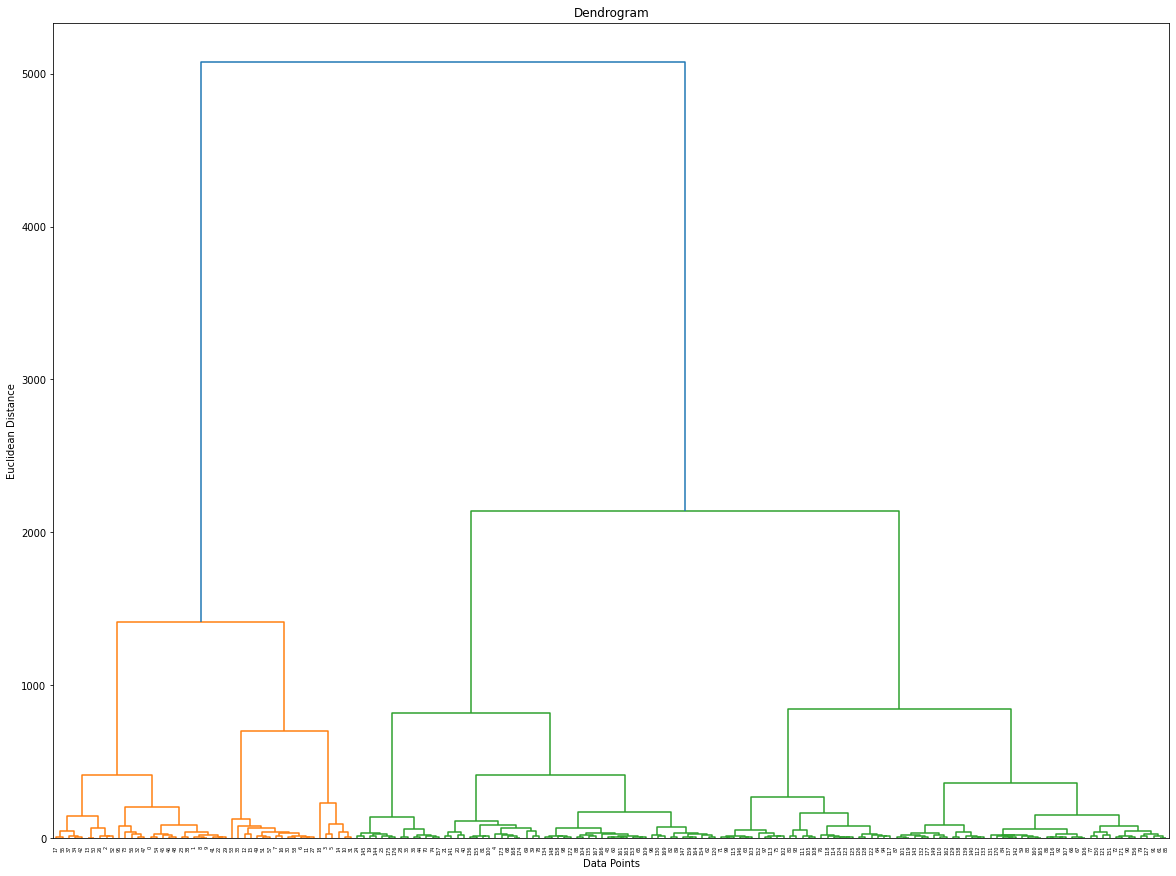

In [20]:
plt.subplots(figsize=(20,15))
dendrogram=sch.dendrogram(sch.linkage(data1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

We can find out that the number of cluster as 2 from the dendrogram

In [21]:
from sklearn.cluster import AgglomerativeClustering

In [22]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(data1)

In [23]:
sil_avg=silhouette_score(data,y_hc)
print('The Silhouette Scoure AgglomerativeClustering',sil_avg)

The Silhouette Scoure AgglomerativeClustering 0.6587292996216912


In [24]:
#db scan

In [25]:
from sklearn.cluster import DBSCAN

In [26]:
#finding out eps value

In [27]:
from sklearn.neighbors import NearestNeighbors

In [28]:
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(data1)
distance,indices=nbrs.kneighbors(data1)

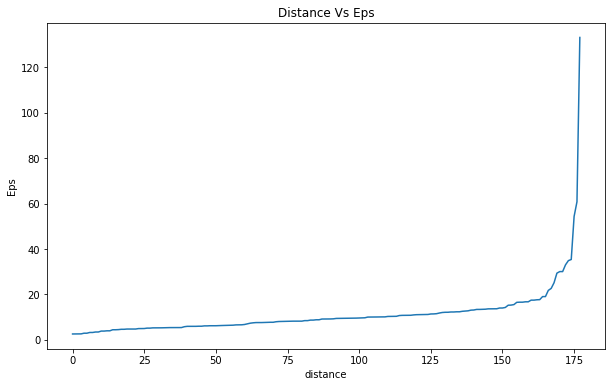

In [29]:
distance=np.sort(distance,axis=0)
distance=distance[:,1]
plt.subplots(figsize=(10,6))
plt.title("Distance Vs Eps")
plt.xlabel("distance")
plt.ylabel("Eps")
plt.plot(distance)

from the graph we can notice that majority of value comes under the eps value 40 so we can take it as eps

In [30]:
db=DBSCAN(eps=40,min_samples=3)
db_model=db.fit(data1)
cluster=db_model.labels_


In [31]:
len(set(cluster))

5

In [32]:
print('Silhouette Score for DBSCAN Clustering model is',silhouette_score(data,cluster))

Silhouette Score for DBSCAN Clustering model is 0.5609783563170826


PCA


Checking the all three clustering methods after PCA to identify if there is any changes

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
#scaling of the whole data
ss=StandardScaler()
data2=ss.fit_transform(data1)
data2=pd.DataFrame(data2,columns=data1.columns)
data2.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


In [35]:
from sklearn.decomposition import PCA

In [36]:
pca1=PCA(n_components=1)
x_pca1=pca1.fit_transform(data2)

In [37]:
x_pca1.shape

(178, 1)

KMeans Clustering After PCA

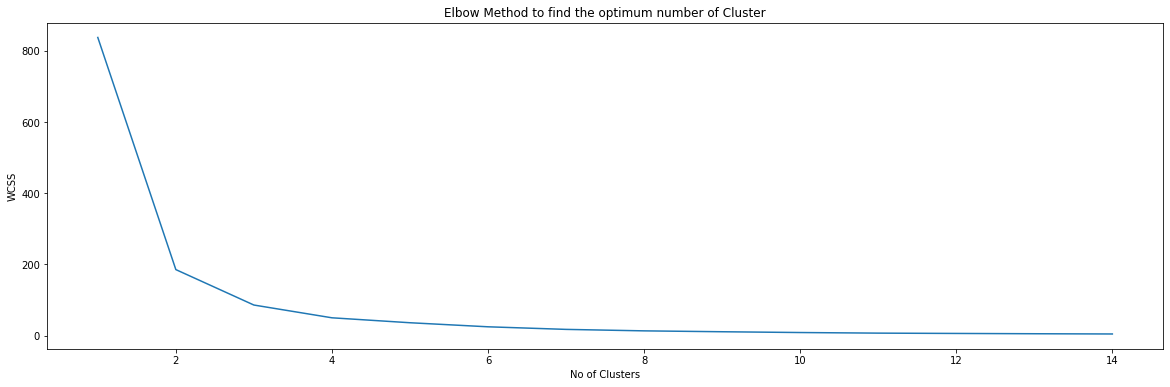

In [38]:
wcss=[]
for i in range(1,15):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(x_pca1)
    wcss.append(kmeans.inertia_)
plt.subplots(figsize=(20,6))
plt.plot(range(1,15),wcss)
plt.xlabel('No of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method to find the optimum number of Cluster')
plt.show()

In [39]:
kmeans=KMeans(n_clusters=2,init='k-means++',random_state=42)
y_kmeans2=kmeans.fit_predict(x_pca1)
sil_avg=silhouette_score(x_pca1,y_kmeans2)
print('The Silhouette Scoure for Cluster number = 2 is',sil_avg)

The Silhouette Scoure for Cluster number = 2 is 0.6581941509236252


In [40]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_kmeans1=kmeans.fit_predict(x_pca1)
sil_avg=silhouette_score(x_pca1,y_kmeans1)
print('The Silhouette Scoure for Cluster number = 3 is',sil_avg)

The Silhouette Scoure for Cluster number = 3 is 0.6055879588442286


Agglometric Clustering after PCA

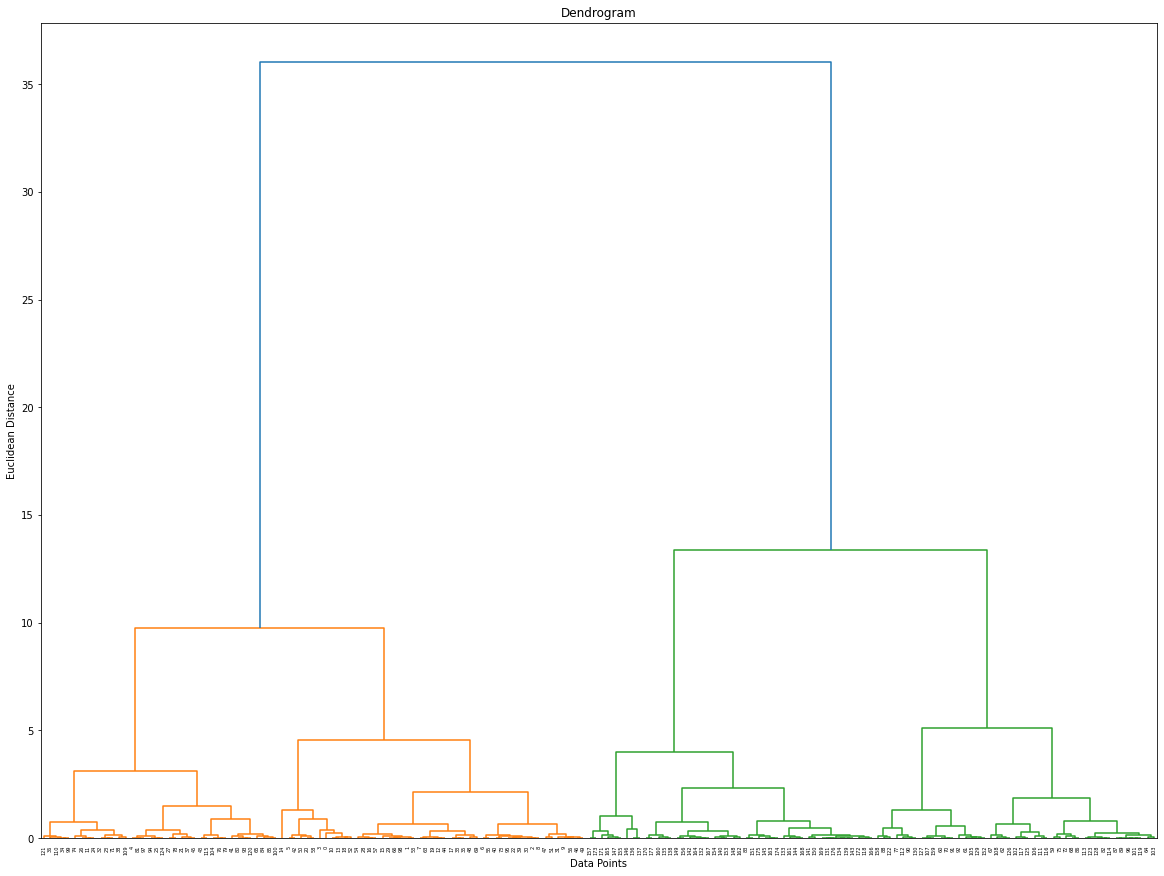

In [41]:
#Finding out the number of cluster
plt.subplots(figsize=(20,15))
dendrogram=sch.dendrogram(sch.linkage(x_pca1,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean Distance')
plt.show()

In [42]:
hc=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
y_hc=hc.fit_predict(x_pca1)

In [43]:
sil_avg=silhouette_score(x_pca1,y_hc)
print('The Silhouette Scoure AgglomerativeClustering',sil_avg)

The Silhouette Scoure AgglomerativeClustering 0.6566427801355206


DBSCAN After PCA

In [44]:
neigh=NearestNeighbors(n_neighbors=2)
nbrs=neigh.fit(x_pca1)
distance,indices=nbrs.kneighbors(x_pca1)

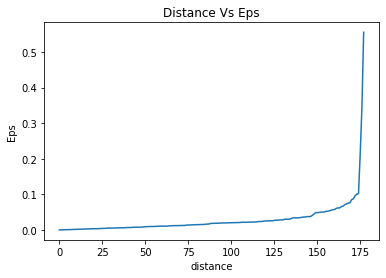

In [45]:
distance=np.sort(distance,axis=0)
distance=distance[:,1]
plt.plot(distance)
plt.title("Distance Vs Eps")
plt.xlabel("distance")
plt.ylabel("Eps")
plt.show()

In [46]:
db=DBSCAN(eps=0.125,min_samples=4)
db_model=db.fit(x_pca1)
cluster=db_model.labels_
len(set(cluster))

12

In [47]:
print('Silhouette Score for DBSCAN Clustering model is',silhouette_score(x_pca1,cluster))

Silhouette Score for DBSCAN Clustering model is 0.29379034926834363


The Model which gived the best Silhouette Score is 

AgglomerativeClustering model without PCA 

Cluster number = 2 is 0.6587292996216912